# _COMP41680 Assignment 2: Text Classification by Akash Nanndi(17200206)_

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import bs4
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import urllib.request
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
link = "http://mlg.ucd.ie/modules/yalp/" # Storing the main link of all the categories in variable link

In [3]:
response = urllib.request.urlopen(link)
html = response.read().decode()
lines = html.strip().split("\n")
for l in lines:
 print(l) # Print out the structure of the webpage to understand which tags to work with ahead

<!DOCTYPE html>
<html lang="en">
<head>
    <meta name="robots" content="noindex">  
    <meta name="description" content="Content on this site is posted for teaching purposes only. Original data is from yelp.com">
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Yalp Reviews &mdash; Home</title>
    <link rel="shortcut icon" href="images/favicon.ico">
    <!-- Bootstrap core CSS -->
    <link href="assets/css/bootstrap.css" rel="stylesheet">
    <!-- Custom styles for this template -->
    <link href="assets/css/style.css" rel="stylesheet">
    <link href="assets/css/font-awesome.min.css" rel="stylesheet">
    <script src="assets/js/modernizr.js"></script>
</head>
<body>
    <div class="container mtb">
    <div class="row">
    <div class="col-md-12">
      <h3 class="info">Yalp Reviews &mdash; Home</h3>
    </div>
    </div>
    <div class="row">
        <div name="

## _<font color=blue>Task 1: Select two review categories of your choice</font>_

In [4]:
links = []
parser = bs4.BeautifulSoup(html,"html.parser")
for linkk in parser.findAll('a'):
    links.append(linkk.get('href'))
print(links)

['automotive_list.html', 'bars_list.html', 'health_medical_list.html', 'hotels_travel_list.html', 'restaurants_list.html']


### _Here we are selecting categories(Hotels and Travel, Resturants)_

In [5]:
links=[link+links[3],link+links[4]] # Storing the links of the two categories that we need in links

In [6]:
sublinks=[]
for l in links:
    a=[]
    response = urllib.request.urlopen(l)
    html = response.read().decode()
    parser = bs4.BeautifulSoup(html,"html.parser")
    for linkk in parser.findAll('a'):
        a.append(linkk.get('href')) # Gets the link of the reviews for individual businesses inside each category and appends them to sublinks
    sublinks.append(a)

In [7]:
sublinks = [ [link+c for c in a] for a in sublinks] # Appending the initial part of the link stored in variable link to the rest of the link

In [8]:
# The first list has the links of reviews of each business inside Hotels and Travel.
# The second list has the links of reviews of each business inside Resturants.
sublinks 

[['http://mlg.ucd.ie/modules/yalp/reviews_Nip4TJZjarrZv2lrPA0YBw.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_i8vUkYPbaXON_42F-bu4pQ.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_o9HuejkSCUgoXnvkihGx2w.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_RYfY6Y2PGVF08Vq2TdDZ-Q.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_E-6l98hX8jICTF6rKHxI8g.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_YFj05UteXLZ_ntk709REAA.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_pnGOezHAOkzk8FmGVL83Ug.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_LnOQxu8snN8DxMCzlFWtxQ.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_ewd4zzAQ-jWF4AO4TfDD0w.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_0OZHqFXau4M5-ScGbiPKpA.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_ZTKtzIGm8Sq93beLHlzQ8A.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_F29wOTdDvl0qZw0GPPYkIQ.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_UiAcw5clXtPReXfI11jTcw.html',
  'http://mlg.ucd.ie/modules/yalp/reviews_L3iHzME7qhwKFl_EaJO49Q

### _Below block of code does the task of scraping through the reviews and storing it in two dataframes which are again stored in a single list._

In [9]:
df=[] # We are creating an empty list where we would store our two dataframes. That is , a list of dataframes.
i=0
for data in sublinks:
    e=[] # This temporary list stores the Reviews of each category for every iteration
    rat=[] # This temporary list stores the Ratings of each category for every iteration
    for d in data:
        response = urllib.request.urlopen(d)
        html = response.read().decode()
        parser = bs4.BeautifulSoup(html,"html.parser")
        for linkk in parser.findAll('p',class_='text'):
            e.append(linkk.text)
        for ratings in parser.findAll('img'):
            if ratings.get('alt')!=None:
                if int(ratings.get('alt')[0])<4:  #  1-star to 3-star reviews are “negative”, and 4-star to 5-star reviews as “positive”.
                    rat.append('Negative')
                else:
                    rat.append('Positive')
        
    df.append(pd.DataFrame(e)) # Appending the two datadrame into a list
    df[i]['Ratings']=rat       # Creating a new column Ratings which stores the rating "Positive" and "Negative".
    i=i+1

In [10]:
# Renaming the column names in both dataframes
df[0].columns=['Review','Ratings']
df[1].columns=['Review','Ratings']

In [11]:
df[0].head() # Print out first 5 rows of the dataframe

,Review,Ratings
0,I have used this service before and was satisf...,Negative
1,First time I tried using them the driver was n...,Negative
2,Driver picked me up on time at 6AM and even kn...,Positive
3,First time using this taxi and limo company as...,Positive
4,Great experience. Driver was early and was ver...,Positive


In [12]:
df[1].head() # Print out first 5 rows of the dataframe

,Review,Ratings
0,Too expensive for what they had... i had an eg...,Negative
1,"Very rustic place. Mismatched furniture, off K...",Positive
2,I highly recommend Au Festin de Babette for th...,Positive
3,Amazing soup and dauphinoise. BUT the wait for...,Negative
4,I went here by recommendation of a friend. Tho...,Negative


## _<font color=blue>Task 2a: Applying Preprocessing steps for classification</font>_

In [13]:
# Factorize creates a unique numeric representation of the Ratings with Negative as 0 and Positive as 1
df[0]['category_id'] = df[0]['Ratings'].factorize()[0]
df[1]['category_id'] = df[1]['Ratings'].factorize()[0]

In [14]:
df[0].head() # Print out first 5 rows of the dataframe

,Review,Ratings,category_id
0,I have used this service before and was satisf...,Negative,0
1,First time I tried using them the driver was n...,Negative,0
2,Driver picked me up on time at 6AM and even kn...,Positive,1
3,First time using this taxi and limo company as...,Positive,1
4,Great experience. Driver was early and was ver...,Positive,1


In [15]:
# Creating dictionaries for future use.
category_id_df = df[0][['Ratings', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Ratings']].values)

In [16]:
id_to_category

{0: 'Negative', 1: 'Positive'}

In [17]:
# Using tfidf vectorizer to create feature sets which will be used in the classification model
vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english')
A = vectorizer.fit_transform(df[0].Review).toarray()
# display some sample weighted values
labels_A=df[0].category_id
A.shape

(1430, 3384)

## _<font color=blue>Task 2b: Building classification model to distinguish between positive and negative reviews</font>_

### _Note: We are performing a binary classification task , that is Positive(1) or Negative(0)_

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[0]['Review'], df[0]['Ratings'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [19]:
print(clf.predict(count_vect.transform(['''Birthday dinner with my husband. This is my 4th time here and I have never been disappointed food wise. I had eggplant Parmesan and my husband had sausage peppers on penne pasta. Portions were HUGE. Kaitlyn, our server, was very attentive. This place blows Antonios away!!! Try it; you'll love it!!'''])))

['Positive']


/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

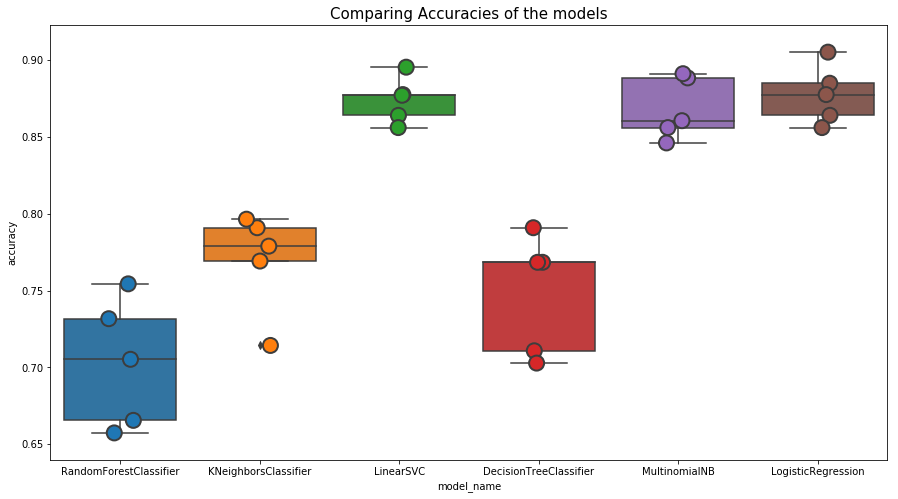

In [20]:
# Creating a list of models to compare accuracies and choose the model fetching the highest accuracy
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    LinearSVC(),
    DecisionTreeClassifier(),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]
CV = 5 # Cross validation value
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, A, labels_A, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='model_name', y='accuracy', data=cv_df,ax=ax)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=15, jitter=True, edgecolor="gray", linewidth=2,ax=ax)
plt.title("Comparing Accuracies of the models",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

### _From the above  boxplot comparisions among the models witha cross validation value of 5 we observe LinearSVC ,Logistic Regression and MultinomialNB among the top performers for the Dataset 1_

In [21]:
cv_df.groupby('model_name').accuracy.mean() # Listing out accuracies of the above models we see that Logestic Regression performed better than the rest

model_name
DecisionTreeClassifier    0.748276
KNeighborsClassifier      0.769979
LinearSVC                 0.874108
LogisticRegression        0.877631
MultinomialNB             0.868530
RandomForestClassifier    0.702841
Name: accuracy, dtype: float64

### _We choose Logistic Regression as it provides the better accuracy among the rest of the algorithms providing 87.76 % accuracy. Note that it might not be always that we choose accuracy as a benchmark for selecting the best classifier. It can depend upon the problem statement._

### _<font color=green>Logistic Regression</font>: It is the go to method for any binary classification problem. An explanation of logistic regression can begin with an explanation of the standard logistic function. The logistic function is a Sigmoid function, which takes any real value between zero and one_

### _a(t)= (e^t)/e^t+1_

##  _<font color=blue>Task 2c: Test the predictions of the classification model using an appropriate evaluation strategy</font>_

### _<font color=green>Evaluation and prediction results</font>_

/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


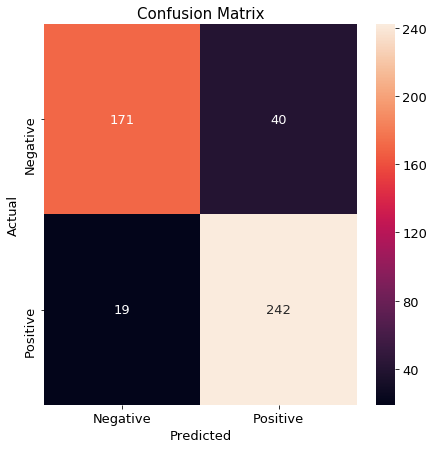

In [22]:
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(A, labels_A, df[0].index, test_size=0.33, random_state=0)
model.fit(X_train, y_train) # Fitting the X_train and y_train to the model
y_pred = model.predict(X_test) # Putting X_test into predict method
conf_mat = confusion_matrix(y_test, y_pred) # Passing y_test and y_pred to generate the confusion matrix
fig, ax = plt.subplots(figsize=(7,7))  # figsize is the size of the figure
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Ratings.values, yticklabels=category_id_df.Ratings.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion Matrix",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

### _From the above confusion matrix we get the true positive and true negative rates which are quite high which tells us that the Logistic Regression does a good job in predicting the reviews for Hotels and Travels_

### _<font color=green>Confusion matrix</font>_: A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.The function confusion_matrix() compares real target labels to predictions, and produces a NumPy array._

- ### _<font color=green>TP </font>_ = _Negative reviews correctly predicted as Negative_
- ### _<font color=green>FP </font>_ = _Positive reviews incorrectly predicted as Negative_
- ### _<font color=green>TN </font>_ = _Positive reviews correctly predicted as Positive_
- ### _<font color=green>FN </font>_ = _Negative reviews incorrectly predicted as Positive_

In [23]:
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred, target_names=df[0]['Ratings'].unique())) # Printing out the classification report which shows us the precision,recall and F1 Measure scores 

Accuracy: 0.875
              precision    recall  f1-score   support

    Negative       0.90      0.81      0.85       211
    Positive       0.86      0.93      0.89       261

   micro avg       0.88      0.88      0.88       472
   macro avg       0.88      0.87      0.87       472
weighted avg       0.88      0.88      0.87       472



- ### _<font color=green>Accuracy </font>_ = _Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:_
### _Accuracy=TP+TN/Total no of predictions_

- ### _<font color=green>Precision </font>_ = _Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives._
### _Precision= TP/TP+FP_


- ### _<font color=green>Recall </font>_ = _The precise definition of recall is the number of true positives divided by the number of true positives plus the number of false negatives_
### _Recall= TP/TP+FN_

- ### _In cases where we want to find an optimal blend of precision and recall we can combine the two metrics using what is called the F1 score._

- ### _<font color=green>F1 Measure</font>_ = _The F1 score is the harmonic mean of precision and recall taking both metrics into account in the following equation:_
### _F1= 2*(Precision*Recall)/(Precision+Recall)_

### _From the above confusion matrix and classification report we get that the logistic regression does a good job in calssifying and predicting the ratings of the reviews with "Negative" reviews having more precision in being predicted correctly which is at 90 %_

### _<font color=green>Performing preprocessing, classification and predictions on the second dataset that is, hotels</font>_

In [24]:
# Creating dictionaries for future use.
category_id_df = df[1][['Ratings', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Ratings']].values)

In [25]:
# Using tfidf vectorizer to create feature sets which will be used in the classification model
vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english')
B = vectorizer.fit_transform(df[1].Review).toarray()
# display some sample weighted values
labels_B=df[1].category_id
B.shape

(1440, 2769)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df[1]['Review'], df[1]['Ratings'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
print(clf.predict(count_vect.transform(['''Most of the beers on the menu that are supposed to be Belgian really aren't. There is no Blue Moon in Belgium or Northcoast brewery. And there are several more mistakes. They should get their act together and don't lie about the origins of their beers. There is no substitute for the real thing.'''])))

['Positive']


/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

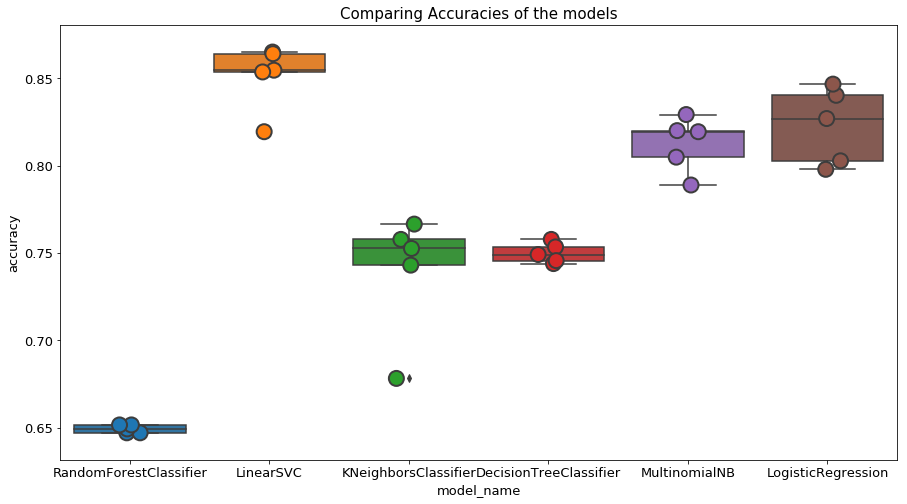

In [28]:
# Creating a list of models to compare accuracies and choose the model fetching the highest accuracy
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5  # Cross validation value
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, B, labels_B, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='model_name', y='accuracy', data=cv_df,ax=ax)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=15, jitter=True, edgecolor="gray", linewidth=2,ax=ax)
plt.title("Comparing Accuracies of the models",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

### _From the above  boxplot comparisions among the models with a cross validation score of 5 we observe LinearSVC among the top performers for the Dataset 2_

In [29]:
cv_df.groupby('model_name').accuracy.mean() # Listing out accuracies of the above models

model_name
DecisionTreeClassifier    0.749995
KNeighborsClassifier      0.739641
LinearSVC                 0.851388
LogisticRegression        0.822927
MultinomialNB             0.812517
RandomForestClassifier    0.649312
Name: accuracy, dtype: float64

### _<font color=green>Linear SVC</font>: The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is._

### _<font color=green>Evaluation and prediction results</font>_

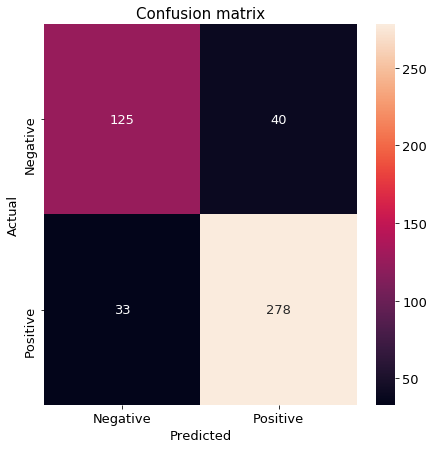

In [30]:
 model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(B, labels_B, df[1].index, test_size=0.33, random_state=0)
model.fit(X_train, y_train) # Fitting the X_train and y_train to the model
y_pred = model.predict(X_test) # Putting X_test into predict method
 # Passing y_test and y_pred to generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)# Passing y_test and y_pred to generate the confusion matrix
fig, ax = plt.subplots(figsize=(7,7)) # figsize is the size of the figure
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Ratings.values, yticklabels=category_id_df.Ratings.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

In [31]:
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred, target_names=df[1]['Ratings'].unique()))# Printing out the classification report which shows us the precision,recall and F1 Measure scores 

Accuracy: 0.8466386554621849
              precision    recall  f1-score   support

    Negative       0.79      0.76      0.77       165
    Positive       0.87      0.89      0.88       311

   micro avg       0.85      0.85      0.85       476
   macro avg       0.83      0.83      0.83       476
weighted avg       0.85      0.85      0.85       476



### _From the above confusion matrix and classification report we get that the LinearSVC does a good job in calssifying and predicting the ratings of the reviews with "Positive" reviews having more precision in being predicted correctly which is at 87 %_

## _<font color=blue>Task 3(a): Training on B, Evaluating on A</font>_

In [32]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(B, labels_B, df[1].index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [33]:
B1=vectorizer.transform(df[0].Review).toarray() # We are using vectorizer.transform to have a common feature set between the two datasets
B1.shape

(1430, 2769)

In [34]:
y_pred = model.predict(B1) # predict the whole test data for hotels and travels on the model created from the resturants dataset

In [35]:
accuracy = metrics.accuracy_score(df[0]['category_id'], y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(df[0]['category_id'], y_pred, target_names=df[0]['Ratings'].unique()))

Accuracy: 0.83006993006993
              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81       637
    Positive       0.86      0.83      0.84       793

   micro avg       0.83      0.83      0.83      1430
   macro avg       0.83      0.83      0.83      1430
weighted avg       0.83      0.83      0.83      1430



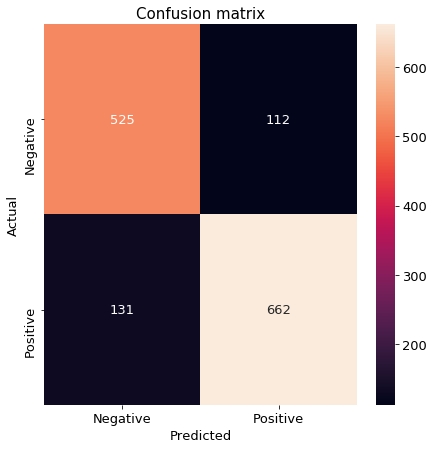

In [36]:
conf_mat = confusion_matrix(df[0]['category_id'], y_pred)# Passing y_test and y_pred to generate the confusion matrix
fig, ax = plt.subplots(figsize=(7,7)) # figsize is the size of the figure
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Ratings.values, yticklabels=category_id_df.Ratings.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

## _<font color=blue>Task 3(b): Training on A, Evaluating on B</font>_

In [37]:
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(A, labels_A, df[0].index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)

/Users/akashnanndi/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english')
A = vectorizer.fit_transform(df[0].Review).toarray()
# display some sample weighted values
labels_A=df[0].category_id
A.shape

(1430, 3384)

In [39]:
A1=vectorizer.transform(df[1].Review).toarray()# We are using vectorizer.transform to have a common feature set between the two datasets
A1.shape

(1440, 3384)

In [40]:
y_pred = model.predict(A1)# predict the whole test data for hotels and travels on the model created from the resturants dataset

In [41]:
accuracy = metrics.accuracy_score(df[1]['category_id'], y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(df[1]['category_id'], y_pred, target_names=df[1]['Ratings'].unique()))

Accuracy: 0.8243055555555555
              precision    recall  f1-score   support

    Negative       0.91      0.56      0.69       507
    Positive       0.80      0.97      0.88       933

   micro avg       0.82      0.82      0.82      1440
   macro avg       0.85      0.76      0.78      1440
weighted avg       0.84      0.82      0.81      1440



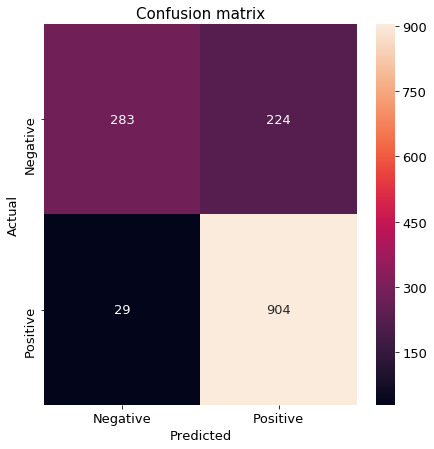

In [42]:
conf_mat = confusion_matrix(df[1]['category_id'], y_pred)# Passing y_test and y_pred to generate the confusion matrix
fig, ax = plt.subplots(figsize=(7,7)) # figsize is the size of the figure
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Ratings.values, yticklabels=category_id_df.Ratings.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix",fontsize=15)
plt.rcParams.update({'font.size': 13})
plt.show()

## _Inferences:_

- ### _In the third task we train the model on Hotels & Travel and test it on the dataset for Resturants. Initially we were predicting the model on the test data generated from the split itself. Now we get an idea as to how our models are performing when trained on a completely new dataset. We see that both the models Linear SVC and Logistic Regression perform decently with accuracy of 82 % and 83 % respectively._
- ### _The third task was to check whether the model performed well when used on an unseen dataset._
- ### _We see that both the models avoid the problem of overfitting and underfitting well._